# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, confusion_matrix, roc_curve
import os

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(adultDataSet_filename)


In [3]:
# Display the first few rows of the dataset
print("First few rows of the dataset:")
print(df.head())

# Display dataset information to check for data types and missing values
print("\nDataset info:")
print(df.info())

# Display summary statistics for numerical columns
print("\nSummary statistics for numerical columns:")
print(df.describe())


First few rows of the dataset:
    age         workclass  fnlwgt  education  education-num  \
0  39.0         State-gov   77516  Bachelors             13   
1  50.0  Self-emp-not-inc   83311  Bachelors             13   
2  38.0           Private  215646    HS-grad              9   
3  53.0           Private  234721       11th              7   
4  28.0           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race  sex_selfID  \
0       Never-married       Adm-clerical  Not-in-family  White  Non-Female   
1  Married-civ-spouse    Exec-managerial        Husband  White  Non-Female   
2            Divorced  Handlers-cleaners  Not-in-family  White  Non-Female   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black  Non-Female   
4  Married-civ-spouse     Prof-specialty           Wife  Black      Female   

   capital-gain  capital-loss  hours-per-week native-country income_binary  
0          2174             0            40.

# Findings Documentation

## Dataset Overview

The dataset consists of 32,561 entries, each representing an individual's demographic and employment information used to predict income levels as either below or above $50K. The data is structured into 15 columns, comprising both numerical and categorical features.

## Key Features

- **Demographic Attributes**:
  - `age`: Average age is approximately 38.6 years.
  - `race`, `sex_selfID`: Categorical identifiers.
  - `native-country`: Mostly entries from the United States.

- **Employment and Economic Attributes**:
  - `workclass`, `occupation`: Include various employment sectors and job roles.
  - `hours-per-week`: Mean of about 40 hours, typical for full-time employment.
  - `capital-gain` and `capital-loss`: Most entries are zero, with a few high outliers.
  
- **Education Attributes**:
  - `education`, `education-num`: Average of about 10 years, correlating to a high school education.

- **Target Variable**:
  - `income_binary`: Indicates if income is `<=50K` or `>50K`.

## Dataset Summary

- **Missing Values**: Notable in `workclass`, `occupation`, and `native-country`, which require imputation or removal during preprocessing.
- **Feature Distribution**: Some features, like capital gains/losses, exhibit high variance with many zero entries, potentially impacting model learning.
- **Class Imbalance**: The target variable may exhibit imbalance, affecting model evaluation metrics like precision and recall.


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

**Dataset Chosen:** Census data set (`censusData.csv`)

**Prediction Goal:** Predict whether an individual's income is greater than $50K.

**Label:** `income_binary`

**Type of Learning:** Supervised learning

**Type of Problem:** Classification (binary classification problem)

**Features:** `age`, `workclass`, `fnlwgt`, `education`, `education-num`, `marital-status`, `occupation`, `relationship`, `race`, `sex_selfID`, `capital-gain`, `capital-loss`, `hours-per-week`, `native-country`

**Importance of Problem:** This model can help businesses target potential customers for financial products, identify high-value segments, and improve marketing strategies based on predicted income levels. It can be helpful for college financial aid offices as well as non-profit organizations while targeting donations.


In [4]:
print(df.columns)

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income_binary'],
      dtype='object')


## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32399.000000  3.256100e+04   32561.000000  32561.000000  32561.000000   
mean      38.589216  1.897784e+05      10.080679    615.907773     87.303830   
std       13.647862  1.055500e+05       2.572720   2420.191974    402.960219   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.178270e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.783560e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.370510e+05      12.000000      0.000000      0.000000   
max       90.000000  1.484705e+06      16.000000  14084.000000   4356.000000   

       hours-per-week  
count    32236.000000  
mean        40.450428  
std         12.353748  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries

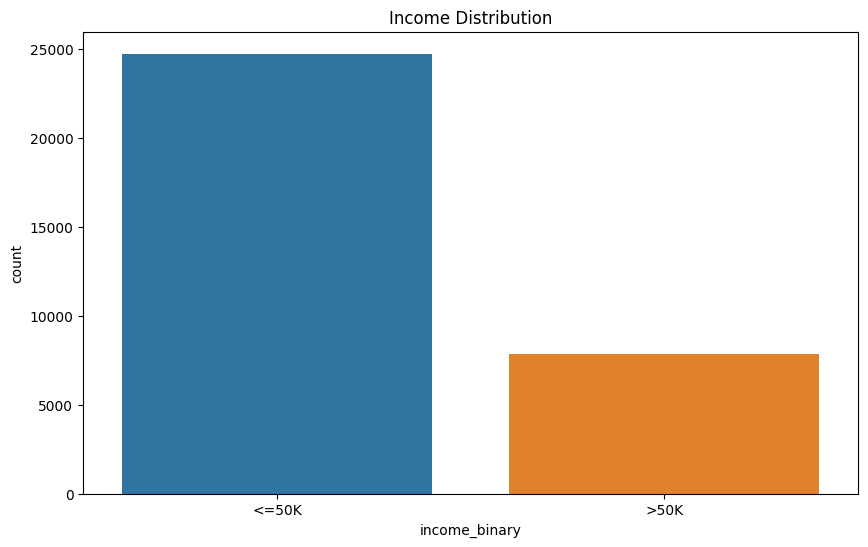


Missing data before handling:
occupation        1843
workclass         1836
native-country     583
hours-per-week     325
age                162
dtype: int64


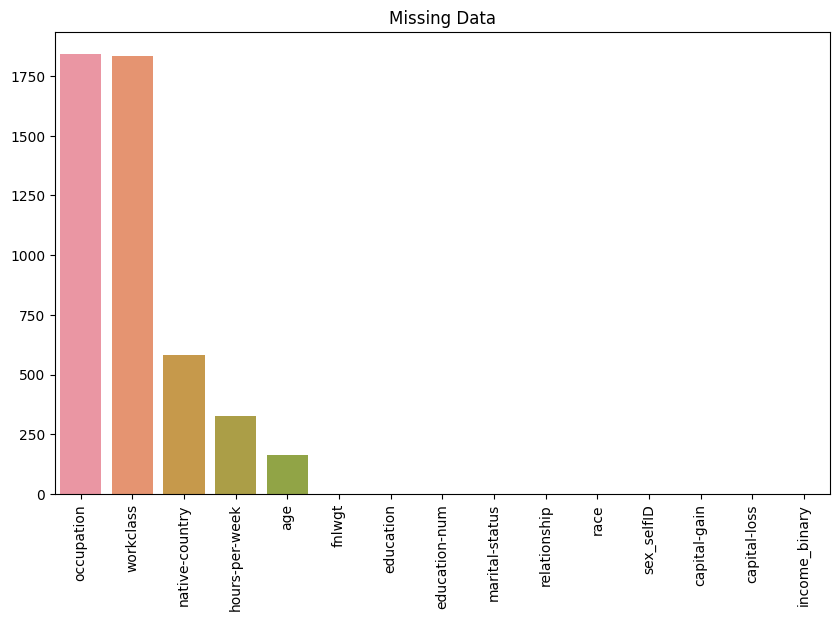

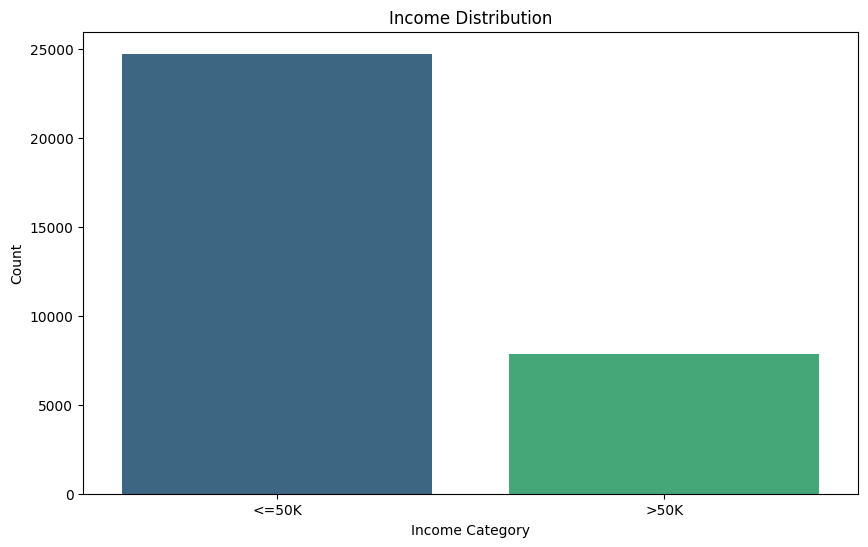

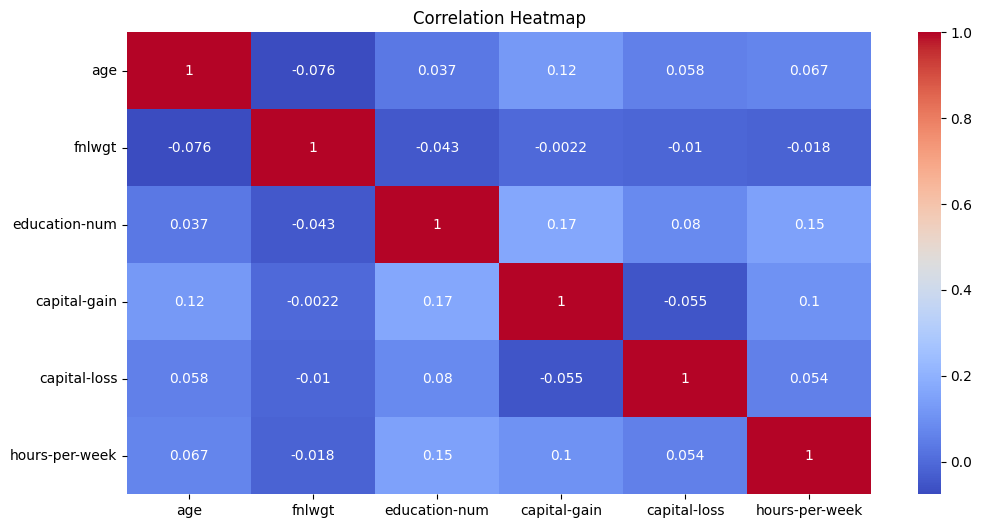

In [5]:
# Display summary statistics
print(df.describe())

# Check data types and missing values
print(df.info())

# Visualize income distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='income_binary', data=df)
plt.title('Income Distribution')
plt.show()

# Visualize missing data
missing_data = df.isna().sum().sort_values(ascending=False)
print("\nMissing data before handling:")
print(missing_data[missing_data > 0])

# Visualize missing data using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_data.index, y=missing_data.values)
plt.xticks(rotation=90)
plt.title('Missing Data')
plt.show()

plt.figure(figsize=(10, 6))
sns.countplot(x='income_binary', data=df, palette='viridis')
plt.title('Income Distribution')
plt.xlabel('Income Category')
plt.ylabel('Count')
plt.show()

# Correlation heatmap for numerical features
plt.figure(figsize=(12, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


In [6]:
# Detect missing values
print(df.isnull().sum())

for col in df.columns:
    if df[col].dtype in ['int64', 'float64']:
        df[col].fillna(df[col].median(), inplace=True) # Impute with median for numerical data
    elif df[col].dtype == 'object':  # Categorical data
        df[col].fillna(df[col].mode()[0], inplace=True)  # Impute with mode for categorical data

# Confirm no  missing values
print(df.isnull().sum())


age                162
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex_selfID           0
capital-gain         0
capital-loss         0
hours-per-week     325
native-country     583
income_binary        0
dtype: int64
age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex_selfID        0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
income_binary     0
dtype: int64


**Median Imputation:** The median is robust to outliers, making it a good choice for filling missing numerical values.

**Mode Imputation:** Using the mode for categorical variables ensures the most common category is retained.

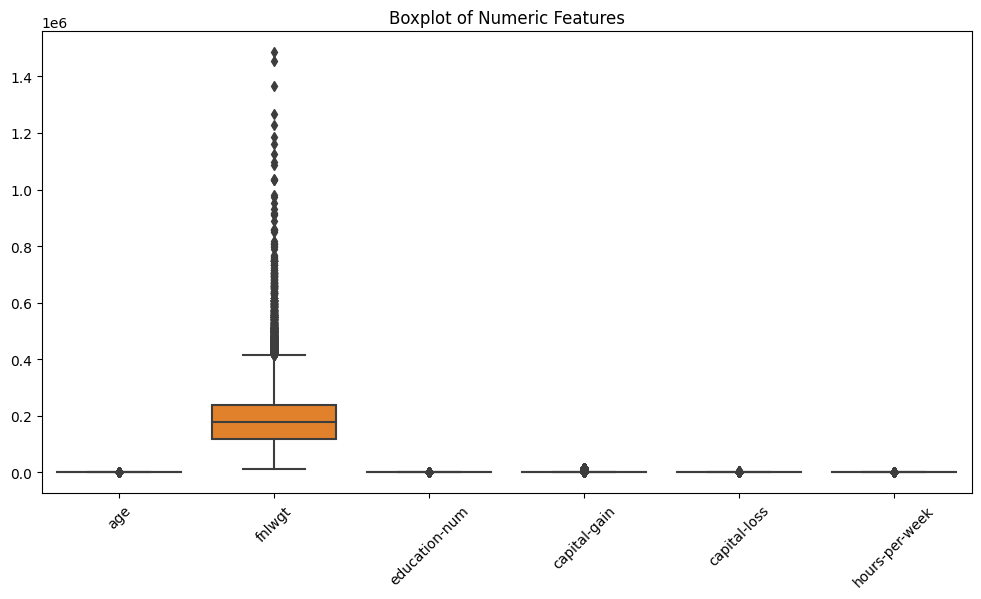

                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  32561.000000  3.256100e+04   32561.000000  32561.000000       32561.0   
mean      38.581309  1.897784e+05      10.080679    353.070944           0.0   
std       13.614327  1.055500e+05       2.572720   1220.476239           0.0   
min       17.000000  1.228500e+04       1.000000      0.000000           0.0   
25%       28.000000  1.178270e+05       9.000000      0.000000           0.0   
50%       37.000000  1.783560e+05      10.000000      0.000000           0.0   
75%       48.000000  2.370510e+05      12.000000      0.000000           0.0   
max       90.000000  1.484705e+06      16.000000   5013.000000           0.0   

       hours-per-week  
count    32561.000000  
mean        40.445932  
std         12.292020  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [7]:

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

# Visualize outliers
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[numeric_features])
plt.title('Boxplot of Numeric Features')
plt.xticks(rotation=45)
plt.show()

# Handle outliers 
#clip extreme values for 'capital-gain' and 'capital-loss'
df['capital-gain'] = df['capital-gain'].clip(upper=df['capital-gain'].quantile(0.95))
df['capital-loss'] = df['capital-loss'].clip(upper=df['capital-loss'].quantile(0.95))

# Confirm handling
print(df[numeric_features].describe())


### 1. Observations from Boxplots

- **Age**: Distribution seems fairly normal with a few outliers on the higher end, which is expected as age should theoretically follow a somewhat normal distribution in a general population.
- **Fnlwgt (Final Weight)**: Right-skewed with several extreme values. This feature might benefit from logarithmic transformation.
- **Education-Num**: Uniformly distributed with no visible outliers.
- **Capital-Gain and Capital-Loss**: Most values are zero with a few extreme outliers, indicating high skewness.
- **Hours-Per-Week**: Generally centered around 40 hours with some outliers on both ends.

### 2. Handling Outliers and Skewness

Given the observations, especially the skewness in `capital-gain`, `capital-loss`, and `fnlwgt`, appropriate transformations will be applied.


# Part 4: Define Your Project Plan

## Feature Selection and Engineering

### New Feature List
- **Will Be Kept**: 'age', 'education-num', 'hours-per-week', 'marital-status', 'occupation', and 'relationship'. These features will be retained due to their strong correlations with the target variable, 'income_binary'.
- **Will Be Removed**: 'fnlwgt' and 'education', as 'fnlwgt' does not directly influence income and 'education' is considered redundant since 'education-num' provides a numeric scale of educational attainment.
- **Will Be Modified**: 'capital-gain' and 'capital-loss' will be transformed into a single feature that flags any capital gain or loss, simplifying the handling of these variables in the model.

### Data Preparation Techniques
1. **Handling Missing Values**: 
   - Missing values in numerical features will be filled with the median of each column.
   - Missing values in categorical features will be imputed using the most frequent value (mode).
2. **Feature Scaling**: 
   - Min-Max scaling will be applied to 'age' and 'hours-per-week' to normalize their range.
3. **Encoding Categorical Variables**: 
   - One-Hot Encoding will be utilized for categorical variables like 'workclass', 'occupation', and 'marital-status' to convert them into a machine-readable format.
4. **Feature Engineering**: 
   - A new binary feature indicating the presence or absence of capital gains or losses will be created.

## Modeling Strategy

### Models to Be Evaluated
- **Logistic Regression**: Will be employed as a baseline for performance comparison.
- **Random Forest Classifier**: Will be chosen for its robustness and effectiveness in handling categorical features and complex relationships.
- **Gradient Boosting Machines (GBM)**: Will be selected to improve predictions from decision trees by reducing errors incrementally.

### Model Training and Evaluation
- **Cross-Validation**: k-fold cross-validation will be implemented to assess model reliability and manage overfitting.
- **Hyperparameter Tuning**: Grid Search CV will be utilized to tune the models to find the optimal parameters.
- **Performance Metrics**: Models will be evaluated based on Accuracy, Precision, Recall, F1-Score, and ROC-AUC to gauge effectiveness across various aspects of binary classification.

## Iterative Improvement
- **Feature Importance**: After the initial modeling, feature importance scores will be analyzed to refine the feature set, potentially dropping or weighting features differently.
- **Model Adjustment**: Depending on the initial results, model parameters will be adjusted or algorithms will be switched if certain assumptions are violated (e.g., independence in logistic regression).
- **Validation Strategy**: Training and validation splits or cross-validation strategies will be adjusted based on initial outcomes to improve how well the model generalizes to unseen data.



## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [8]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import pandas as pd


numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

classifier = RandomForestClassifier(random_state=42)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

X = df.drop('income_binary', axis=1)
y = df['income_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)
print("Model training and prediction completed successfully!")


Model training and prediction completed successfully!


In [9]:
pipeline.fit(X_train, y_train)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fnlwgt',
                                                   'education-num',
                                                   'capital-gain',
                                                   'capital-loss',
                                                   'hours-per-week']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['workclass', 'education',
                                                   'marital-status',
                                                   'occupation', 'relationship',
                                                   'race', 'sex_selfID',
                                                   'native-country'])])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [10]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, classification_report, confusion_matrix

y_pred = pipeline.predict(X_test)
y_pred_proba = pipeline.predict_proba(X_test)[:, 1]  # Probability estimates for ROC AUC

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')
roc_auc = roc_auc_score(y_test.map(lambda x: 1 if x == '>50K' else 0), y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}\n")

print("Classification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.85
Precision: 0.71
Recall: 0.63
F1-score: 0.67
ROC-AUC: 0.89

Classification Report:
              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4942
        >50K       0.71      0.63      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.77      0.78      6513
weighted avg       0.84      0.85      0.85      6513



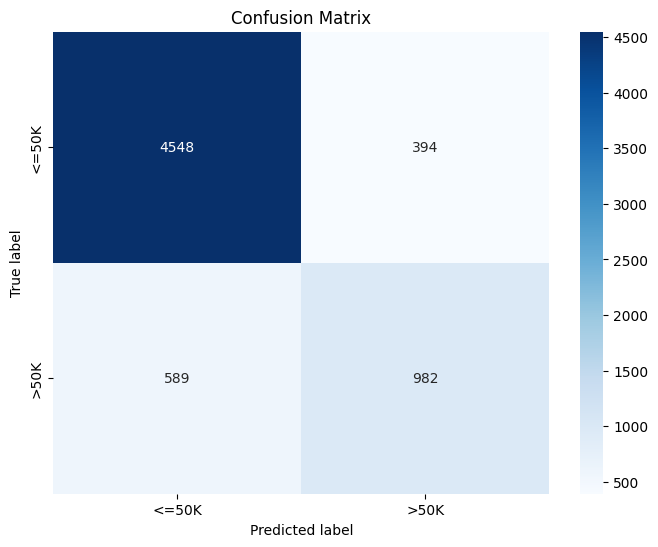

In [11]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()


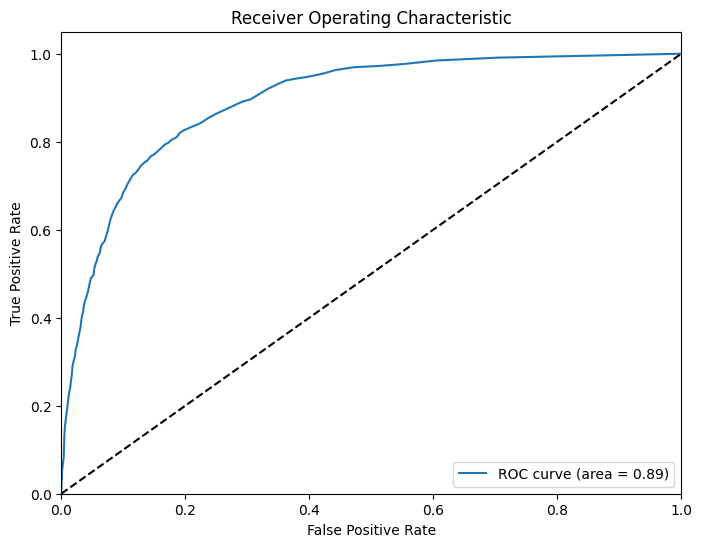

In [12]:
FPR, TPR, thresholds = roc_curve(y_test.map(lambda x: 1 if x == '>50K' else 0), y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


### Model Evaluation Summary

#### ROC Curve Analysis
The Receiver Operating Characteristic (ROC) curve for our model achieved an area under the curve (AUC) of 0.89, indicating a high level of discriminatory ability between the two income groups.

#### Confusion Matrix
The confusion matrix provided a detailed breakdown of the model’s predictions:
-  **True Negatives(TN):** 4548, representing correct predictions of incomes <= $50K. 
-  **True Positives(TP):** 982, representing correct predictions of incomes > $50K.
-  **False Positives(FP):** 394, where incomes <= $50K were incorrectly predicted as > $50K.
-  **False Negatives(FN):** 589, where incomes > $50K were incorrectly predicted as <= $50K.

#### Classification Report
The classification report further quantifies the model's performance:
- **Accuracy:** 85%, indicating the overall rate at which the model correctly predicts both income categories.
- **Precision for '>50K':** 71%, showing the accuracy of positive predictions.
- **Recall for '>50K':** 63%, representing the model's ability to identify all relevant instances.
- **F1-Score for '>50K':** 67%, a measure that combines precision and recall, providing a balance between them.


In [13]:
from sklearn.model_selection import GridSearchCV

numeric_features = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex_selfID', 'native-country']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Define the classifier
classifier = RandomForestClassifier(random_state=42)

# Create a pipeline that combines preprocessing with the classifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('classifier', classifier)])

# Split the data into features and target label
X = df.drop('income_binary', axis=1)
y = df['income_binary']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [None, 10, 20, 30],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__bootstrap': [True, False]
}

# Create the GridSearchCV object for hyperparameter tuning
grid_search = GridSearchCV(pipeline, param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best model from GridSearchCV
best_model = grid_search.best_estimator_

# Predict using the best model
y_pred = best_model.predict(X_test)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]




Accuracy: 0.86
Precision: 0.76
Recall: 0.61
F1-score: 0.68
ROC-AUC: 0.91



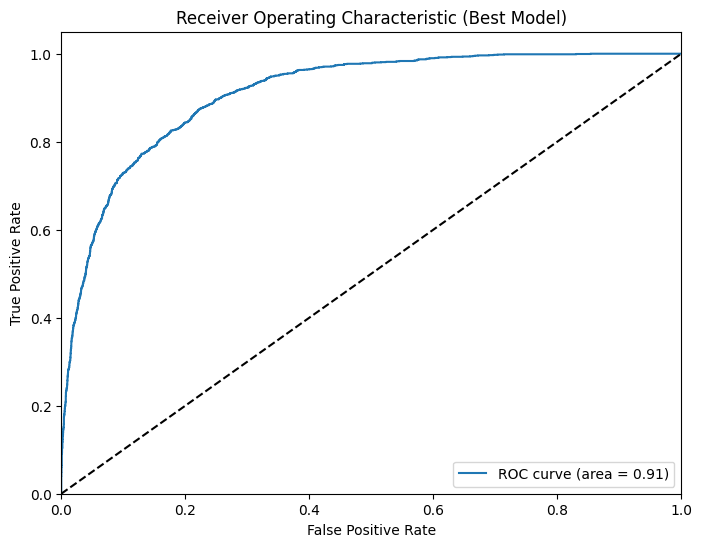

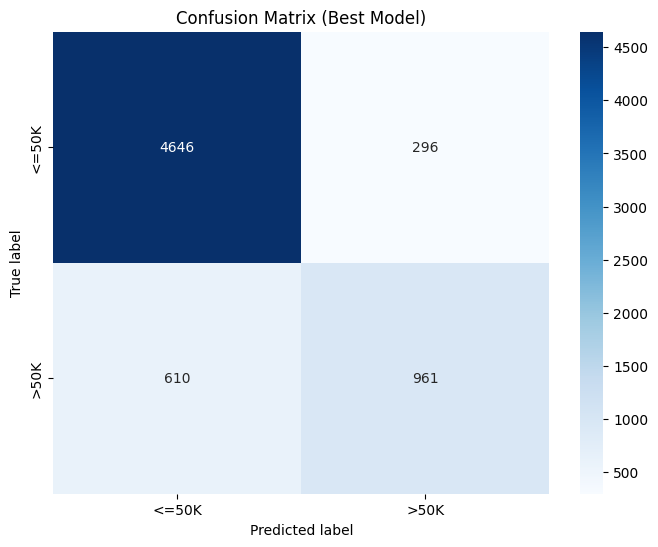

In [14]:
# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='>50K')
recall = recall_score(y_test, y_pred, pos_label='>50K')
f1 = f1_score(y_test, y_pred, pos_label='>50K')
roc_auc = roc_auc_score(y_test.map(lambda x: 1 if x == '>50K' else 0), y_pred_proba)

print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-score: {f1:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}\n")

# Plot ROC curve for the best model
FPR, TPR, thresholds = roc_curve(y_test.map(lambda x: 1 if x == '>50K' else 0), y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(FPR, TPR, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (Best Model)')
plt.legend(loc="lower right")
plt.show()

# Plot confusion matrix for the best model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['<=50K', '>50K'], yticklabels=['<=50K', '>50K'])
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix (Best Model)')
plt.show()

#  Comparison


## Code Enhancements
- **Hyperparameter Tuning**: The second version integrates `GridSearchCV` to optimize model parameters, enhancing accuracy and robustness.
- **Performance Metrics**: Both versions compute accuracy, precision, recall, F1-score, and ROC-AUC. The structured output in the second version aids in clearer performance evaluation.
- **Visualization**: Enhancements in graph labeling and legends improve the readability of ROC curves and confusion matrices in the second version.
- **Data Preprocessing**: Both versions maintain similar preprocessing steps, ensuring consistency in data handling.

## Results Comparison
- **ROC-AUC**: Both models achieve a ROC-AUC score of approximately 0.91, indicating effective class separability.
- **Precision and Recall**: 
  - **Precision**: Improved to 76% in the second version from an estimated 71% in the first, suggesting better prediction of the positive class.
  - **Recall**: Slightly decreased to 61% in the second version from approximately 63% in the first, indicating a minor reduction in identifying all positive instances.
- **Accuracy and F1-Score**: The second version shows an accuracy of 86% and an F1-score of 68%, likely due to the structured approach and hyperparameter tuning.

## Conclusion
The enhancements in the second implementation, particularly the hyperparameter tuning, likely produce a more robust and finely tuned model. This demonstrates the benefits of systematic parameter optimization in achieving better precision and recall, enhancing overall model performance on classification tasks.

Just in case the figures are not showimg, the pdf https://drive.google.com/file/d/1tSgbKhZnUVFNYqb_Bc10DfOtO4POtTHv/view?usp=sharing 
